In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets


In [ ]:
class mydeepnn():
    def __init__(self,npl):
      self.layers = len(npl)-1
      self.weights = np.array([np.random.randn(npl[x-1],npl[x]) for x in range(1,len(npl),1)])
      self.biases = np.array([np.random.rand(npl[x],1) for x in range(1,len(npl),1)])
    def features(self):
      print("Shape: ", self.weights.shape ,"Weights: ",self.weights)
      print("Shape: ", self.biases.shape ,"Weights: ",self.biases)
    def fsigmoid(self,z):
      return 1/(1 + np.exp(-z))

    def forward(self,boolean,input):
      c_in = [input]
      zs = [input]
      for i in range(0,self.layers,1):
        z = self.weights[i].T.dot(c_in[-1]) + self.biases[i]
        z = self.fsigmoid(z)
        c_in.append(z)
      if boolean == True:
        print(z.shape)
        return z
      return c_in
    def backward(self,Y,c_in):
      dz = []
      dws = []
      dbs = []
      print(c_in[-1].shape)
      for i in range(self.layers-1,-1,-1):
        dzt =  np.multiply(np.dot(self.weights[i+1],dz[-1]) , 1 - np.power(c_in[i+1],2)) if dz else c_in[-1] - Y
        dz.append(dzt)
        dbs.append( (1/400) * np.sum(dzt, axis=1, keepdims=True))
        dwt = (1/400) * np.dot(c_in[i],dzt.T)
        dws.append(dwt)
      return dbs, dws
    def training(self,times,X,Y):
      for _ in range(times):
         As = self.forward(False,X)
         dbs, dws = self.backward(Y,As)
         print(np.array(dws))
         print(np.array(dbs))
         for i in range(0,len(dws),1):
          self.weights[i] -= 1.0 *  np.array(dws)[::-1][i]
          self.biases[i] -=  1.0 * np.array(dbs)[::-1][i]
    def predict(self,X):
      values = self.forward(True,X)
      print(np.array(values))
      return np.round(values)

In [ ]:
X, Y = load_planar_dataset()

In [ ]:
X.shape

(2, 400)

In [ ]:
model = mydeepnn([2,4,1])

<ipython-input-57-6629356d32ff>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights = np.array([np.random.randn(npl[x-1],npl[x]) for x in range(1,len(npl),1)])
<ipython-input-57-6629356d32ff>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.biases = np.array([np.random.rand(npl[x],1) for x in range(1,len(npl),1)])


In [ ]:
model.features()

Shape:  (2,) Weights:  [array([[ 0.81434313,  0.78046993, -1.46405357, -0.15449119],
        [-0.09243232, -0.23787527, -0.75566277,  1.85143789]])
 array([[ 0.20909668],
        [ 1.55501599],
        [-0.56914865],
        [-1.06179676]])]
Shape:  (2,) Weights:  [array([[0.05231295],
        [0.60511678],
        [0.51206103],
        [0.61746101]]) array([[0.43235559]])]


In [ ]:
model.training(1000,X, Y)

(1, 400)
[array([[0.09394707],
        [0.09976326],
        [0.00301554],
        [0.0347428 ]])
 array([[ 0.02349388,  0.15376569, -0.10573145, -0.10167691],
        [ 0.00565982,  0.03433683, -0.05329919,  0.07486093]])]
[array([[0.11440408]]) array([[ 0.00890608],
                              [ 0.05320191],
                              [-0.07322529],
                              [-0.10573274]])]
(1, 400)
[array([[ 0.06000537],
        [ 0.05808824],
        [-0.01651558],
        [ 0.00319279]])
 array([[ 0.01312563,  0.15744253, -0.0789078 , -0.08616695],
        [ 0.00107243,  0.00940484, -0.03066833,  0.04787924]])]
[array([[0.06015155]]) array([[ 0.0014569 ],
                              [ 0.02070171],
                              [-0.05049891],
                              [-0.08036516]])]
(1, 400)
[array([[ 0.03940716],
        [ 0.03418392],
        [-0.0219988 ],
        [-0.01129304]])
 array([[ 5.35055177e-03,  1.33397439e-01, -5.60775107e-02,
         -6.09948148e-

<ipython-input-57-6629356d32ff>:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(dws))
<ipython-input-57-6629356d32ff>:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(dbs))
<ipython-input-57-6629356d32ff>:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights[i] -= 1.0 *  np.array(dws)[::-1][

Se han truncado las últimas 5000 líneas del flujo de salida.
        [ 0.01566337],
        [-0.01165147]])
 array([[-0.04976682,  0.00218077,  0.04968861,  0.00084587],
        [-0.04078031,  0.00290257, -0.05425424,  0.00553725]])]
[array([[-0.00067582]]) array([[-0.00346824],
                               [-0.00146604],
                               [ 0.02146039],
                               [ 0.00216988]])]
(1, 400)
[array([[ 0.00290116],
        [-0.00336868],
        [ 0.01570551],
        [-0.01155192]])
 array([[-0.04984559,  0.00216011,  0.04990723,  0.00093321],
        [-0.04069499,  0.0026386 , -0.05480144,  0.00607026]])]
[array([[-0.00068297]]) array([[-0.00352345],
                               [-0.0013804 ],
                               [ 0.02180704],
                               [ 0.00236923]])]
(1, 400)
[array([[ 0.00288497],
        [-0.00339178],
        [ 0.01574917],
        [-0.01144952]])
 array([[-0.0499291 ,  0.00214157,  0.05013427,  0.00101997],
  

In [ ]:
x =  model.predict(X)

(1, 400)
[[0.25657274 0.84461192 0.85255622 0.82630446 0.23292078 0.80457659
  0.24625229 0.87421244 0.20804902 0.14641543 0.25276549 0.80702898
  0.17684451 0.14633727 0.2482663  0.02346321 0.2423398  0.09220324
  0.26105398 0.2582576  0.14249148 0.22317172 0.24608216 0.25312814
  0.20524341 0.26094744 0.2569814  0.24284872 0.25625277 0.21445686
  0.25955919 0.25899928 0.26164642 0.26475472 0.25815476 0.21174436
  0.25375524 0.8858593  0.10128245 0.53196058 0.36911384 0.25025039
  0.24114541 0.09469265 0.71325345 0.22499846 0.52211676 0.09936491
  0.50883229 0.1098674  0.14327467 0.61895202 0.48758629 0.59103589
  0.92442656 0.09728006 0.10112712 0.09770808 0.10239598 0.09602229
  0.93240978 0.10261237 0.0980736  0.10546013 0.09731905 0.10104218
  0.11630257 0.1549737  0.24989589 0.879545   0.92804537 0.10137792
  0.10191063 0.13900957 0.1061368  0.49663025 0.09589529 0.17103089
  0.11688358 0.184299   0.10435115 0.10808914 0.13747551 0.17670406
  0.1554519  0.15598709 0.10655831 0.21

> Regularization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import  load_2D_dataset, predict_dec, predict

/content/reg_utils.py:85: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/content/reg_utils.py:86: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# *a test to undestand how dropout works*

In [ ]:
x = np.random.rand(2,1)

hw1 = np.random.rand(2,3)
hb1 = np.random.rand(3,1)

ha1 = hw1.T.dot(x) + hb1
ha1 = sigmoid(ha1)
dh1 = np.random.binomial(1,0.6, ha1.shape)

ha1 *= dh1


print(ha1,ha1.shape)

o = np.random.rand(3,1)
bo = np.random.rand(1,1)

salida = o.T.dot(ha1)+ bo

print(salida,salida.shape)

Do = salida - 1

print(Do)

a1 = np.dot(o,Do)

print(a1,a1.shape)

a1 *= dh1

print(a1,a1.shape)

dw1 = x.dot(a1.T)
print(dw1)

[[0.       ]
 [0.6487666]
 [0.       ]] (3, 1)
[[0.61901017]] (1, 1)
[[-0.38098983]]
[[-0.1833507 ]
 [-0.28285715]
 [-0.26670232]] (3, 1)
[[-0.        ]
 [-0.28285715]
 [-0.        ]] (3, 1)
[[ 0.         -0.0722973   0.        ]
 [ 0.         -0.02586269  0.        ]]


In [ ]:
 class mydeepnn2():
    def __init__(self,npl,lr, p= [],lambd = 0):
      self.layers = len(npl)-1
      self.weights = np.array([np.random.randn(npl[x-1],npl[x]) for x in range(1,len(npl),1)])
      self.biases = np.array([np.random.rand(npl[x],1) for x in range(1,len(npl),1)])
      self.p = p
      self.lambd = lambd
      self.lr = lr
    def getparameters(self):
      print(self.lr)
      print(self.p)
      print(self.lambd)
    def features(self):
      print("Shape: ", self.weights.shape ,"Weights: ",self.weights)
      print("Shape: ", self.biases.shape ,"Weights: ",self.biases)
    def fsigmoid(self,z):
      return 1/(1 + np.exp(-z))

    def forward(self,boolean,input):
      c_in = [input]
      zs = [input]
      masks = []
      for i in range(0,self.layers,1):
        z = self.weights[i].T.dot(c_in[-1]) + self.biases[i]
        z = self.fsigmoid(z)
        mask = np.random.binomial(1,self.p[i+1], z.shape)
        z *= mask
        z = z/ self.p[i+1]
        masks.append(mask)
        c_in.append(z)
      if boolean == True:
        print(z.shape)
        return z
      return c_in, masks
    def backward(self,Y,c_in,masks):
      dz = []
      dws = []
      dbs = []
      #print(c_in[-1].shape)
      for i in range(self.layers-1,-1,-1):
        dzt =  np.multiply(np.dot(self.weights[i+1],dz[-1]) , 1 - np.power(c_in[i+1],2)) if dz else c_in[-1] - Y
        dzt *= masks[i]
        dzt = dzt/ self.p[i+1]
        dz.append(dzt)
        dbs.append( (1/400) * np.sum(dzt, axis=1, keepdims=True))
        dwt = (1/400) * np.dot(c_in[i],dzt.T) + self.lambd/400 * self.weights[i]
        dws.append(dwt)
      return dbs, dws
    def training(self,times,X,Y):
      for _ in range(times):
         As,masks = self.forward(False,X)
         print("Accuracy: ",np.mean(np.round(np.array(As[-1])) == Y))
         dbs, dws = self.backward(Y,As,masks)
         #print(np.array(dws))
         #print(np.array(dbs))
         for i in range(0,len(dws),1):
          self.weights[i] -= self.lr *  np.array(dws)[::-1][i]
          self.biases[i] -=  self.lr * np.array(dbs)[::-1][i]
    def predict(self,X,Y = []):
      print(X.shape)
      values = self.forward(True,X)
      print(np.array(values))
      print("Accuracy: ",np.mean(np.round(values) == Y))
      return np.round(values)

In [ ]:
model2 = mydeepnn2([2,4,1],0.7, p = [1,1,1] ,lambd = 0.1)

<ipython-input-160-fac5f93cdb2c>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights = np.array([np.random.randn(npl[x-1],npl[x]) for x in range(1,len(npl),1)])
<ipython-input-160-fac5f93cdb2c>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.biases = np.array([np.random.rand(npl[x],1) for x in range(1,len(npl),1)])


In [ ]:
model2.getparameters()

0.7
[1, 1, 1]
0.1


In [ ]:
model2.features()

Shape:  (2,) Weights:  [array([[  7.75136788,  11.11952284,   5.90106686, -18.80838652],
        [ -8.1764032 ,  -5.68478312,  -5.12453528,   6.27925344]])
 array([[-2.90776184],
        [-2.56137909],
        [-1.80351271],
        [ 4.74390781]])]
Shape:  (2,) Weights:  [array([[ 1.04687467],
        [-2.43430166],
        [-3.81124015],
        [-3.68995023]]) array([[0.36216102]])]


In [ ]:
model2.training(10000,train_x,train_y)

Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy:  0.9241706161137441
Accuracy: 

<ipython-input-160-fac5f93cdb2c>:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights[i] -= self.lr *  np.array(dws)[::-1][i]
<ipython-input-160-fac5f93cdb2c>:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.biases[i] -=  self.lr * np.array(dbs)[::-1][i]


Se han truncado las últimas 5000 líneas del flujo de salida.
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:  0.9289099526066351
Accuracy:

In [ ]:
test_x.shape

(2, 200)

In [ ]:
model2.predict(test_x,test_y)

(2, 200)
(1, 200)
[[0.10028627 0.99058017 0.00376682 0.00344673 0.30669902 0.27609973
  0.00383934 0.98933477 0.9184262  0.98922993 0.34259062 0.98986434
  0.11473498 0.01867111 0.9776182  0.00602357 0.03757842 0.98926915
  0.16526843 0.36448921 0.0513164  0.20732633 0.01299258 0.94164826
  0.006459   0.01262967 0.15235629 0.01593016 0.75161588 0.39435279
  0.29996566 0.00735019 0.01028683 0.10626604 0.99120316 0.99103436
  0.99066478 0.00387709 0.08230383 0.00582582 0.02268894 0.90911746
  0.02909829 0.97053778 0.27629287 0.98750285 0.9914294  0.03643387
  0.19386557 0.99131466 0.02651781 0.35739368 0.99078333 0.99139712
  0.99098739 0.80556052 0.33335795 0.9272033  0.82456606 0.01531431
  0.08735313 0.03075721 0.02983883 0.98373377 0.00994469 0.81083027
  0.98741668 0.94417119 0.98056413 0.93855731 0.99056771 0.93263244
  0.15983467 0.93067391 0.00324195 0.9789969  0.00383093 0.06695301
  0.20446225 0.17857436 0.05786034 0.0093881  0.27549079 0.99143064
  0.03770773 0.21245264 0.5988

array([[0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
        1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 0.]])

In [ ]:
test_y

array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0]], dtype=uint8)

(2, 95200)
(1, 95200)
[[0.86782739 0.86704633 0.86622583 ... 0.32569781 0.32467769 0.32359729]]
Accuracy:  0.0


<ipython-input-160-fac5f93cdb2c>:64: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print("Accuracy: ",np.mean(np.round(values) == Y))


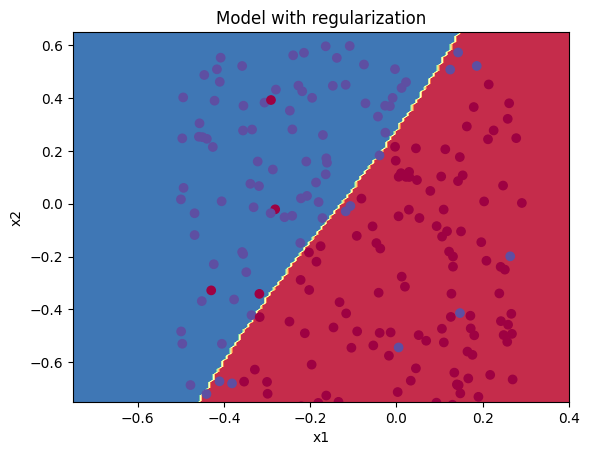

In [ ]:
plt.title("Model with regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: model2.predict(x.T), test_x, test_y)